In [ ]:
from PIL import Image

: 

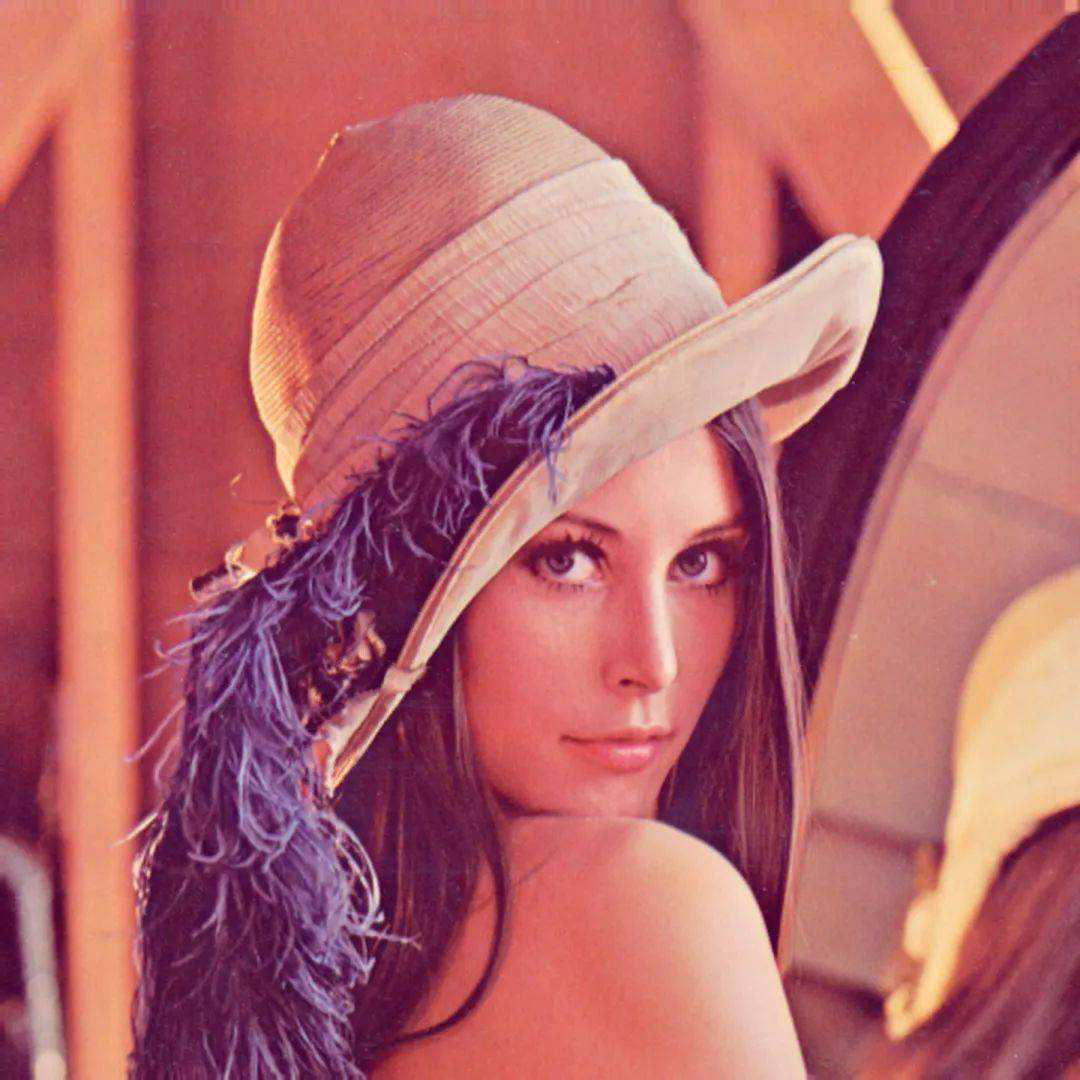

In [ ]:
img_path = '../imgs/lena.jpeg' #读取图像的地址
img = Image.open(img_path) #读取图像
img

In [9]:
#也可以用image的show
img.show()

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


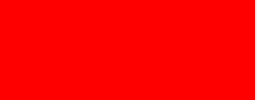

In [10]:
# 使用 Image 类提供的 new() 方法可以创建一个新的 Image 对象，语法格式如下:
# im=Image.new(mode,size,color)
# 参数说明如下：
# mode：图像模式，字符串参数，比如 RGB（真彩图像）、L（灰度图像）、CMYK（色彩图打印模式）等；
# size：图像大小，元组参数（width, height）代表图像的像素大小；
# color：图片颜色，默认值为 0 表示黑色
im_1 = Image.new(mode='RGB', size=(255, 100), color=(255,0,0))  
im_1

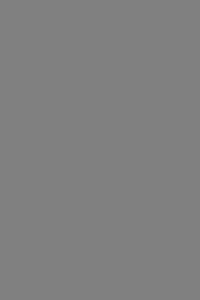

In [11]:
im_1 = Image.new(mode='L', size=(200, 300), color=(128)) 
im_1

In [6]:
# save() 方法用于保存图像，当不指定文件格式时，它会以默认的图片格式来存储；如果指定图片格式，则会以指定的格式存储图片。
# save() 的语法格式如下：
# Image.save(fp, format=None)
# 参数说明如下：
# fp：图片的存储路径，包含图片的名称，字符串格式；
# format：可选参数，可以指定图片的格式。
im_1.save('./gray.png')

In [7]:
#分离通道

im=Image.open("test.jpeg")
#修改图像大小，以适应图像处理
image=im.resize((450,400))
image.save("test_resize.jpeg")
#分离颜色通道，产生三个 Image对象
r,g,b = image.split()
r.show()
g.show()
b.show()

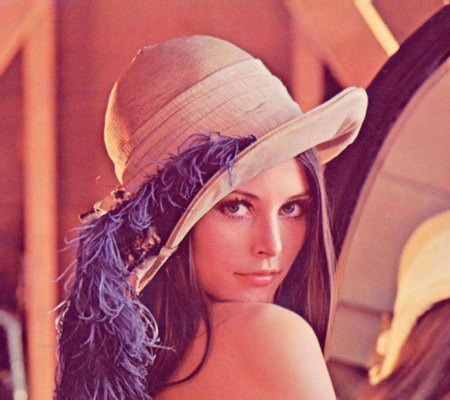

In [8]:
#合并通道
image_merge=Image.merge('RGB',(r,g,b))
image_merge

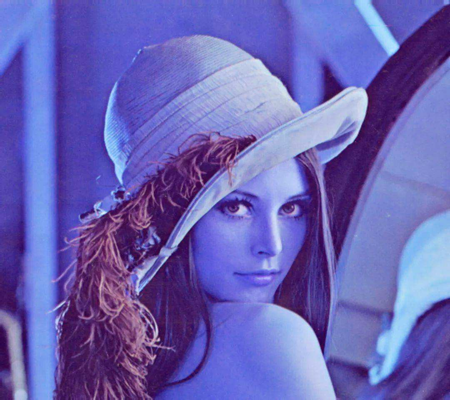

In [9]:
#合并通道
image_merge=Image.merge('RGB',(b,g,r))
image_merge

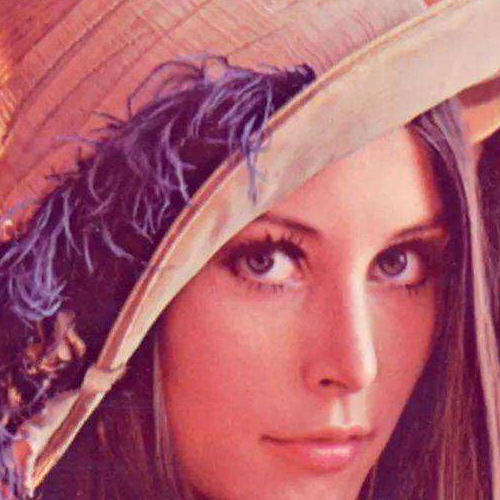

In [10]:
# 图像裁剪
# crop(box=None)
# box：表示裁剪区域，默认为 None，表示拷贝原图像。
# 注意：box 是一个有四个数字的元组参数 (x_左上,y_左下,x1_右上,y1_右下)，
# 分别表示被裁剪矩形区域的左上角 x、y 坐标和右下角 x，y 坐标。默认 (0,0)
# 表示坐标原点，宽度的方向为 x 轴，高度的方向为 y 轴，每个像素点代表一个单位。
bbox =(300,300,800,800)
img_crop = img.crop(bbox)
img_crop

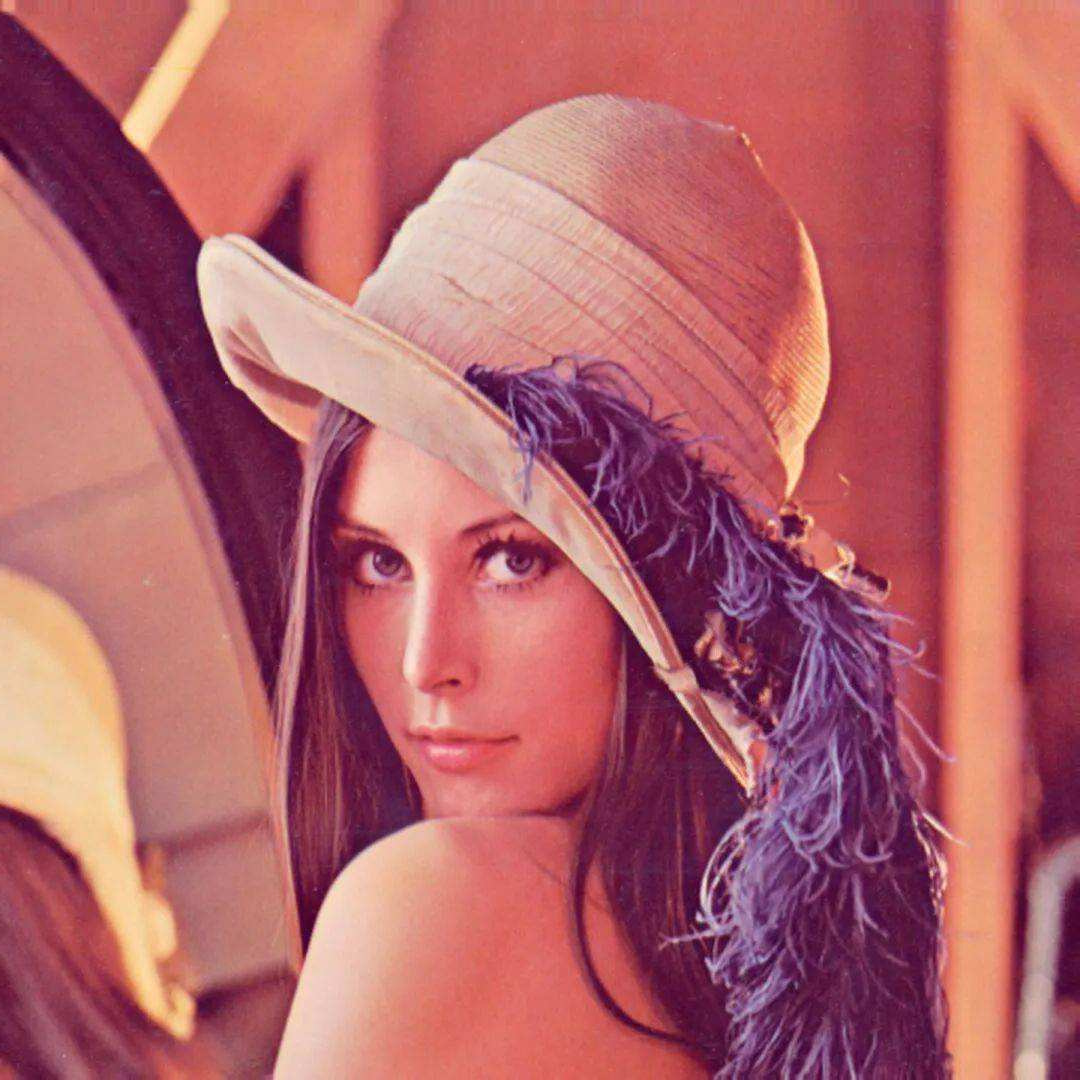

In [11]:
# 图像旋转操作
# 	Image.transpose(method)
# 	method 参数决定了图片要如何翻转，参数值如下：
# Image.FLIP_LEFT_RIGHT：左右水平翻转；
# Image.FLIP_TOP_BOTTOM：上下垂直翻转；
# Image.ROTATE_90：图像旋转 90 度；
# Image.ROTATE_180：图像旋转 180 度；
# Image.ROTATE_270：图像旋转 270 度；
# Image.TRANSPOSE：图像转置；
# Image.TRANSVERSE：图像横向翻转。

# 左右水平翻转
img_FLIP_LEFT_RIGHT = img.transpose(Image.FLIP_LEFT_RIGHT)
img_FLIP_LEFT_RIGHT

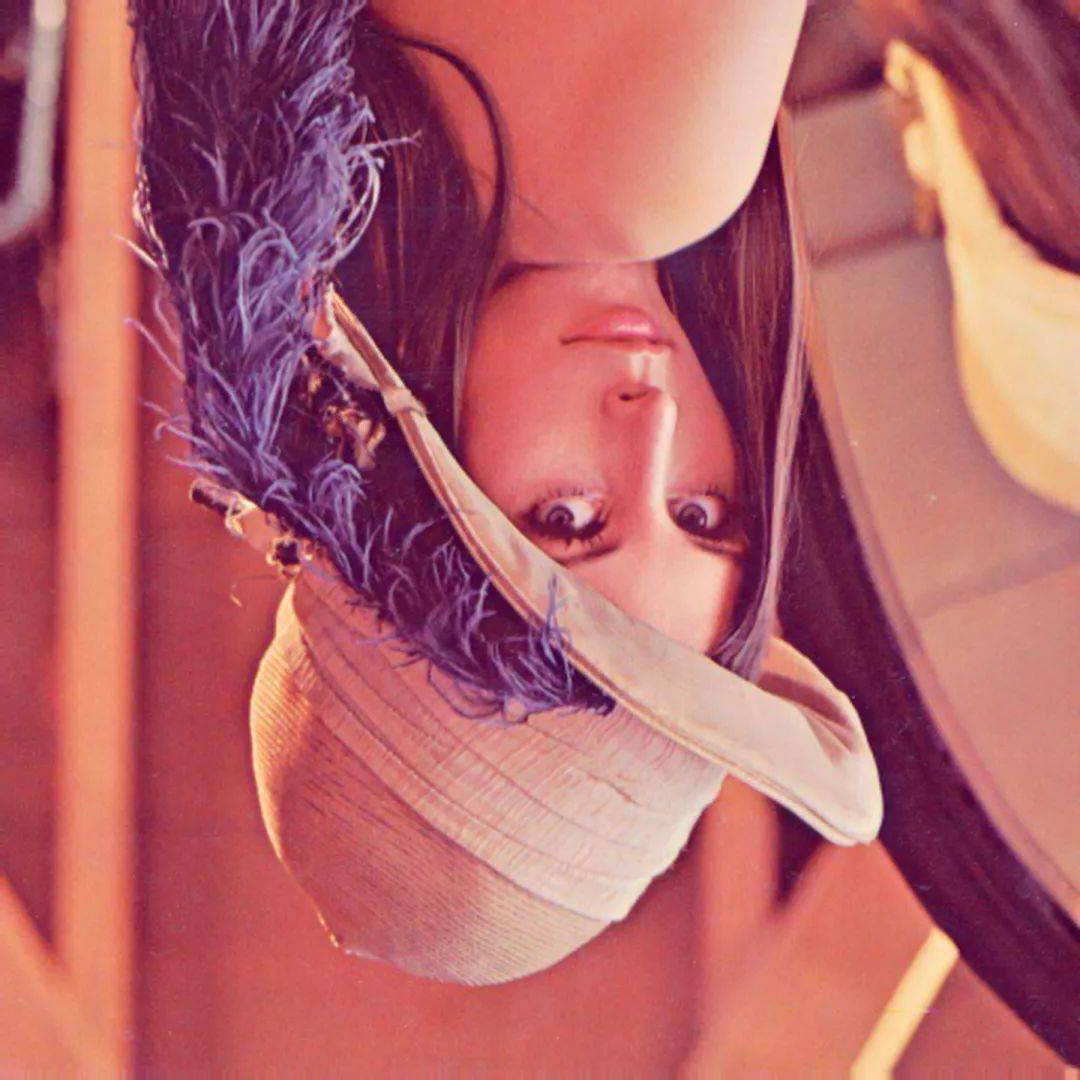

In [12]:
# 上下垂直翻转
img_FLIP_TOP_BOTTOM = img.transpose(Image.FLIP_TOP_BOTTOM)
img_FLIP_TOP_BOTTOM

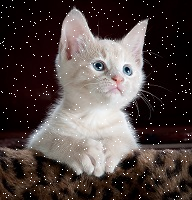

In [13]:
# 噪声处理
img_noisy = Image.open("cute_cat.png")
img_noisy

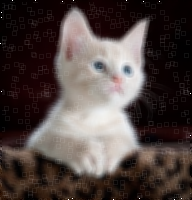

In [14]:
# 均值滤波（模糊滤波）在Pillow库中，ImageFilter.BLUR 滤镜提供的模糊效果是固定的，没有直接的参数来调整模糊的程度。
from PIL import ImageFilter 
blurred_img = img_noisy.filter(ImageFilter.BLUR)
blurred_img

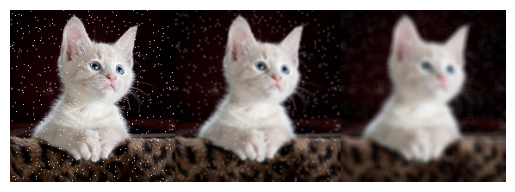

In [15]:
# 用cv进行均值滤波
import cv2
import numpy as np
import matplotlib.pyplot  as plt
#自定义一个读取图像函数
def show(img):
    if img.ndim==2:
        plt.imshow(img,cmap='gray')
    else:
        img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img2)
    plt.axis('off')
    plt.show()
#读取图片
img=cv2.imread('cute_cat.png')
#分别3*3和7*7的卷积核进行均值模糊
img2=cv2.blur(img,(3,3))
img3=cv2.blur(img,(7,7))
#显示图片
show(np.hstack([img,img2,img3]))

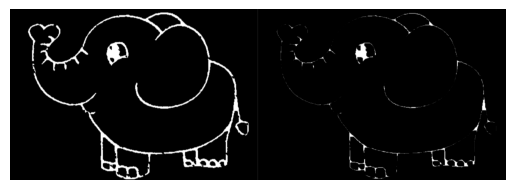

In [16]:
# 侵蚀
# 侵蚀的基本思想就像土壤侵蚀一样，它侵蚀前景物体的边界(尽量使前景保持白色)。它是做什么的呢?原始图像中的一个像素(无论是1还是0)
# 只有当内核下的所有像素都是1时才被认为是1，否则它就会被侵蚀(变成0)。
# 结果是，根据内核的大小，边界附近的所有像素都会被丢弃。因此，前景物体的厚度或大小减小，
# 或只是图像中的白色区域减小。它有助于去除小的白色噪声(正如我们在颜色空间章节中看到的)，分离两个连接的对象等。
# 在这里，作为一个例子，我将使用一个5x5内核，它包含了所有的1。让我们看看它是如何工作的

img = cv2.imread('ele.jpg',0)
kernel = np.ones((5,5),np.uint8)
img_erosion = cv2.erode(img,kernel,iterations = 1)
show(np.hstack([img,img_erosion]))

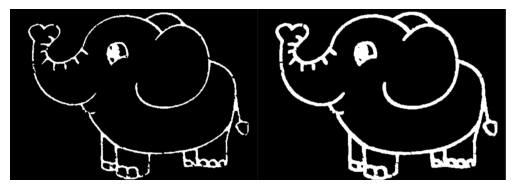

In [17]:
# 它与侵蚀正好相反。如果内核下的至少一个像素为“ 1”，则像素元素为“ 1”。
# 因此，它会增加图像中的白色区域或增加前景对象的大小。
# 通常，在消除噪音的情况下，腐蚀后会膨胀。因为腐蚀会消除白噪声，但也会缩小物体。
# 因此，我们对其进行了扩展。由于噪音消失了，它们不会回来，但是我们的目标区域增加了。在连接对象的损坏部分时也很有用。
img_dilation = cv2.dilate(img,kernel,iterations = 1)
show(np.hstack([img,img_dilation]))

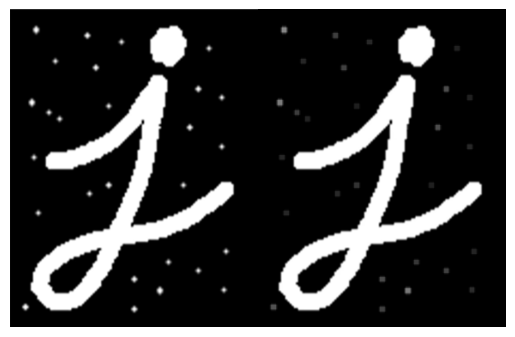

In [18]:
# 开运算
# 开运算是先侵蚀后扩张
# 图像被腐蚀后，去除了噪声，但是也压缩了图像；接着对腐蚀过的图像进行膨胀处理，可以去除噪声，并保留原有图像。
img = cv2.imread('kai.jpg', 0)
img_k = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
show(np.hstack([img,img_k]))

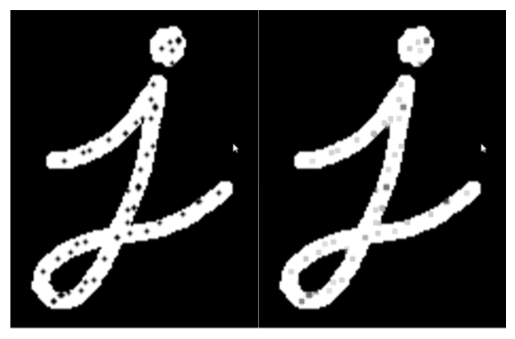

In [19]:
# 闭运算
# 闭运算是先扩张后再侵蚀
# 图像先膨胀，后腐蚀，它有助于关闭前景物体内部的小孔，或物体上的小黑点。
img = cv2.imread('bi.jpg', 0)
img_b = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
show(np.hstack([img,img_b]))

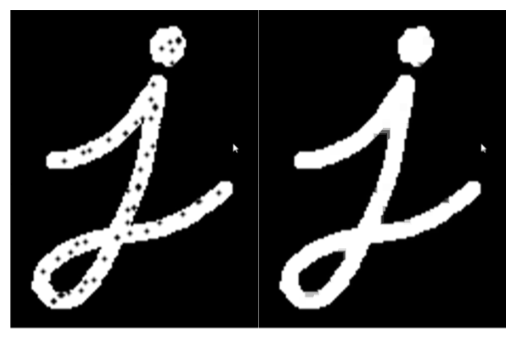

In [20]:
# 变动kernel
kernel = np.ones((9,9),np.uint8)
img_b = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
show(np.hstack([img,img_b]))

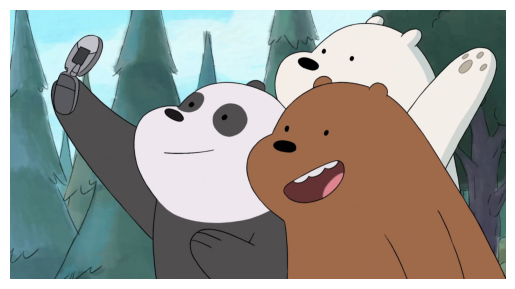

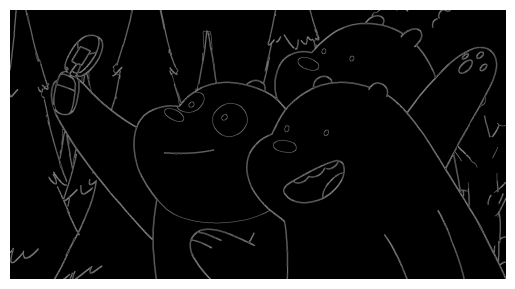

In [21]:
# 边缘检测
# canny边缘检测

# 加载图像
image = cv2.imread('bear.jpg')

# 灰度化
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 边缘检测
edges = cv2.Canny(gray, 100, 200)

show(image)

# 显示结果
show(edges)

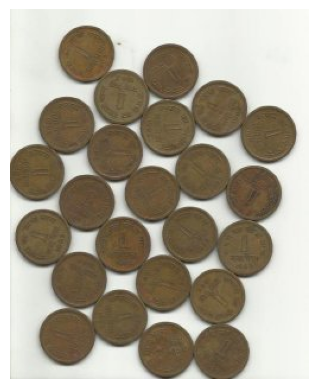

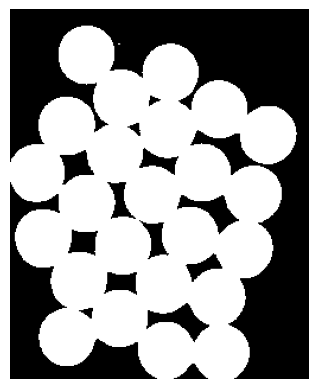

In [22]:
# 图像分割
# Otsu反向二值化阈值分割
# Otsu算法称为最大类间方差法，该方法主要是通过阈值进行前后背景分割，
# 而该方法确定最佳阈值的方法是该值使类间方差最大，它是按图像的灰度特性,
# 将图像分成背景和前景两部分，使类间方差最大的分割意味着错分概率最小。
img = cv2.imread( 'coin.jpg' )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0 , 255 , cv2.THRESH_BINARY_INV +
                             cv2.THRESH_OTSU)
show(img)
show(thresh)

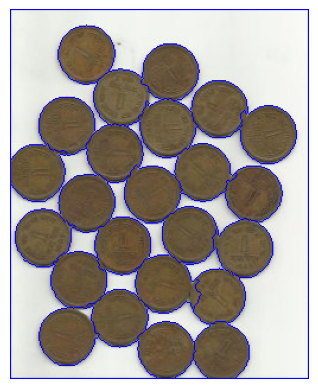

In [23]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
show(img)